In [1]:
# Pràctica 6 secció 3a


In [ ]:
var("x,y,a");a=0

In [ ]:
eq1=-a+1.*x^2+2*y^2

In [54]:
eq2=1.*y+1.*y^2

In [55]:
# He necesitat possar-li els "1." multiplicant per forçar al SAGE a treballar en mode numèric

In [56]:
sol=solve([eq1,eq2],x,y);sol

[[x == 0, y == 0], [x == -I*sqrt(2), y == -1], [x == I*sqrt(2), y == -1]]

In [57]:
px1=sol[0][0].rhs();px1

0

In [58]:
py1=sol[0][1].rhs();py1

0

In [59]:
px2=sol[1][0].rhs();px2

-I*sqrt(2)

In [60]:
py2=sol[1][1].rhs();py2

-1

In [61]:
px3=sol[2][0].rhs();px3

I*sqrt(2)

In [62]:
py3=sol[2][1].rhs();py3

-1

In [63]:
px4=sol[3][0].rhs();px4

IndexError: list index out of range

In [64]:
py4=sol[3][1].rhs();py4

IndexError: list index out of range

In [65]:
# Prescindim de les singularitats complexes

In [66]:
qx=px1

In [67]:
qy=py1

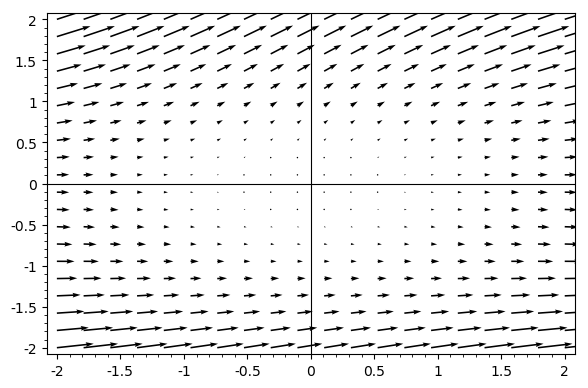

In [68]:
plot=plot_vector_field((eq1,eq2), (x,qx-2,qx+2), (y,qy-2,qy+2));plot

In [69]:
var("t");

In [70]:
# Estudiem primer que és cada punt singular

In [71]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px1,y=py1);A

[0 0]
[0 1]

In [72]:
A.eigenvalues()

[0, 1]

In [73]:
# Això te un valor propi zero  i un diferent de zero. Pot ser un NODE, una SELLA, o un SELLA-NODE

In [74]:
# Anem pel darrer punt singular

In [75]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px1,y=py1);A

[0 0]
[0 1]

In [76]:
A.eigenvalues()

[0, 1]

In [77]:
(N(A.eigenvalues()[0]),N(A.eigenvalues()[1]))

(0.000000000000000, 1.00000000000000)

In [78]:
# ?????

In [79]:
px=px1;py=py1;h=0.01;step1=0.01;

In [80]:
vec=A.eigenvectors_right();vec

[(0, [(1, 0)], 1), (1, [(0, 1)], 1)]

In [81]:
vec[0][0]

0

In [107]:
kt=80;var("t");
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=-step1)


In [108]:
sol1=[[j,k] for i,j,k in sol]

In [109]:
sep5=list_plot(sol1,color="blue")

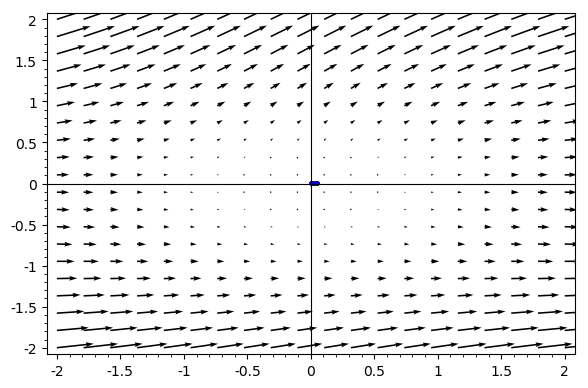

In [110]:
plot+sep5

In [90]:
kt=6;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [139]:
sol1=[[j,k] for i,j,k in sol]

In [140]:
if(vec[0][0]<0):
    sep6=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep6=list_plot(sol1,color="red")

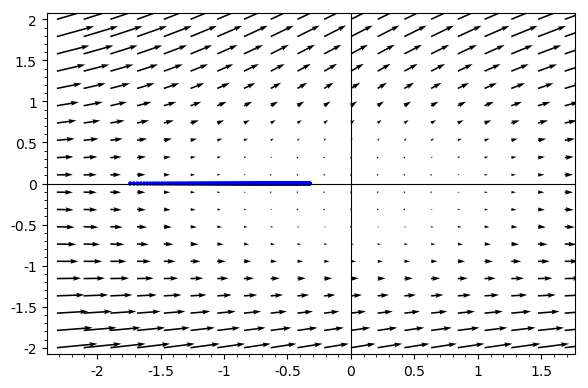

In [141]:
plot+sep6

In [142]:
kt=4.2;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [143]:
sol1=[[j,k] for i,j,k in sol]

In [144]:
if(vec[1][0]<0):
    sep7=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep7=list_plot(sol1,color="red")

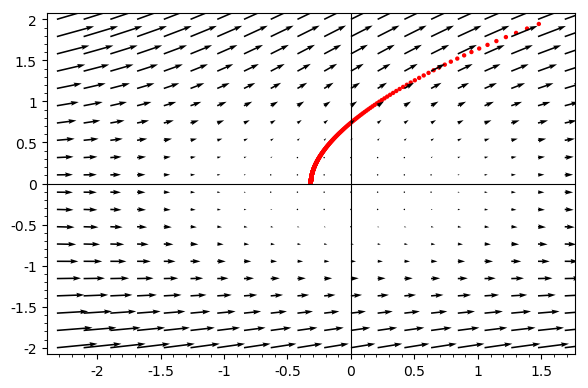

In [145]:
plot+sep7

In [146]:
kt=4;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [147]:
sol1=[[j,k] for i,j,k in sol]

In [148]:
if(vec[1][0]<0):
    sep8=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep8=list_plot(sol1,color="red")

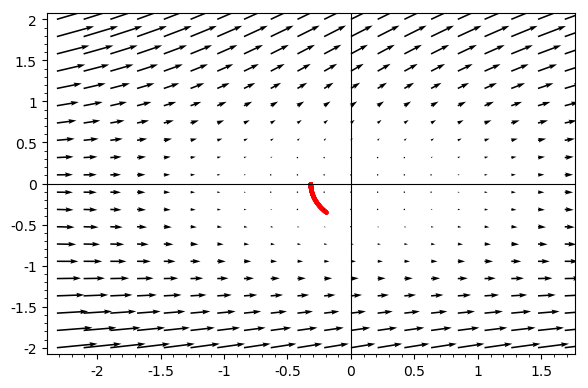

In [149]:
plot+sep8

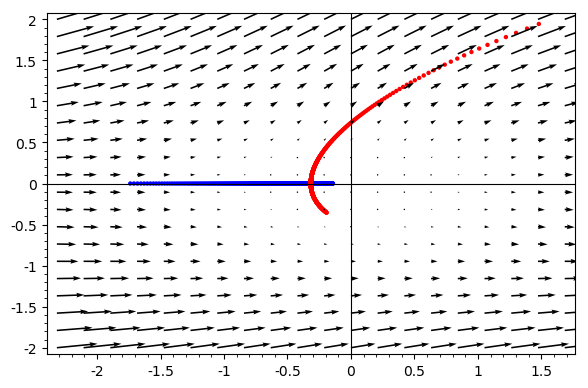

In [150]:
plot+sep5+sep6+sep7+sep8

In [151]:
# Amb el veiem aquí, i sapiguent que no hi ha més punts singulars, 
# ja podem saber que farà qualsevol altra òrbita que passi per un punt concret.

In [56]:
px=0;py=0.5;kt=0.7;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [57]:
sol1=[[j,k] for i,j,k in sol]

In [58]:
orb1=list_plot(sol1,color="yellow")

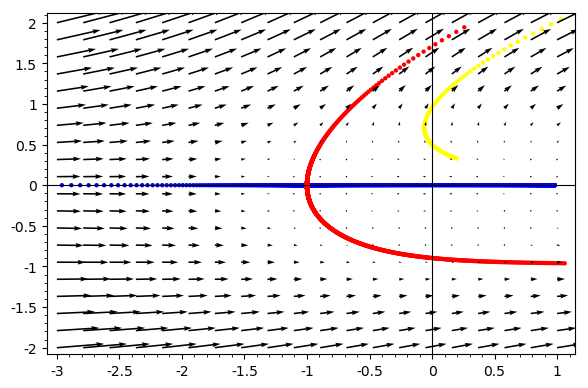

In [59]:
plot+sep5+sep6+sep7+sep8+orb1

In [60]:
px=0.;py=0.5;kt=3;sol=desolve_system_rk4([-eq1, -eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [61]:
sol1=[[j,k] for i,j,k in sol]

In [62]:
orb2=list_plot(sol1,color="yellow")

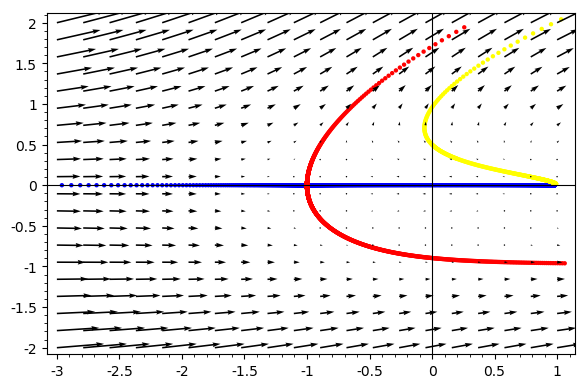

In [63]:
plot+sep5+sep6+sep7+sep8+orb1+orb2

In [ ]:
sol1